In [1]:
import copy
import sys
sys.path.insert(0, "../../")
from classes.atom_classes.atom import Atom
from classes.atom_classes.atom_file_handler import Atom_File_handler
from classes.atom_classes.atom_collection import Atom_Collection
from classes.atom_classes.atom_collection_plotter import Animator, Atom_Collection_Plotter
from classes.calculators.lennardjones import LennardJones
from classes.optimizers.random_struct_search import Line_searcher1
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
plt.rc('animation', html='jshtml')

In [2]:
class Atom_plotter(Animator):
    def __init__(self, default_cols=("C0", "C1"), markersize=50, scale_with_mass=False, alpha=1) -> None:
        super().__init__(default_cols, markersize, scale_with_mass, alpha)
    
    def animate(self, i, atom_col, position, plot_several_cells=False):
        atom_col.set_atom_positions(position)
        plot_elems_atoms = self(atom_col)
        add_plot_elems = []
        if plot_several_cells == False:
            pass
        else:
            add_plot_elems = self.plot_several_cells(atom_col=atom_col)
            add_plot_elems = [f for d in add_plot_elems
                                for l in d
                                for f in l]
        return plot_elems_atoms["atoms"] + add_plot_elems

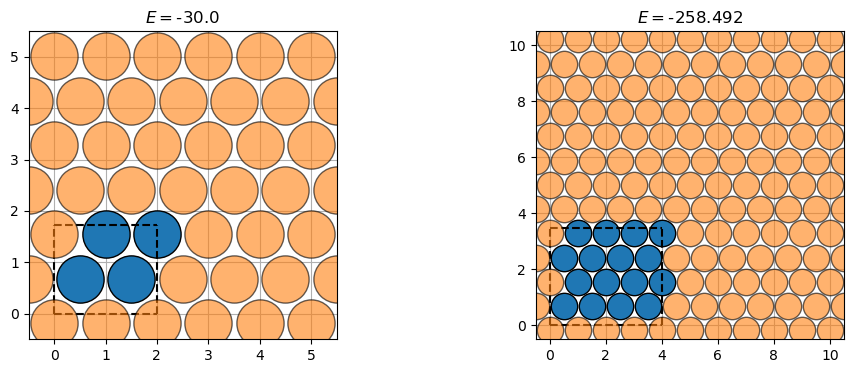

In [3]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
for ax, grid in zip(axs, [[-0.5,5.5], [-0.5,10.5]]):
    ax.set_xlim(grid)
    ax.set_ylim(grid)
    ax.grid()
    ax.set_aspect("equal")

atom_plotter = Atom_plotter(markersize=34)
atom_writer = Atom_File_handler()


unit_cell = (np.array([2.0, 0.0]), np.cos(np.pi/6.0)*np.array([0.0,2.0]))
atom_poses = [np.array([0.0,0.0]), np.array([0.5,0.5]), np.array([1.0,0.0]), np.array([1.5,0.5])]
freeze_atoms = [False] + [False for i in range(3)]
atom_col = Atom_Collection(atomlist=[Atom(position=pos, frozen=froz) for pos, froz in zip(atom_poses, freeze_atoms)], unit_cell=unit_cell, pbc=True)
atom_col.calculator = LennardJones()
optimizer = Line_searcher1(atom_col=atom_col)
optimizer.run(fmax=1e-2, track=False)
opt_col = optimizer.best_atom_col
atom_writer.save_atom_collections(atom_cols=[opt_col], filename="opt_atom_col")
axs[0].set_title(rf"$E = ${opt_col.get_potential_energy().round(3)}")
atom_plotter(atom_col=opt_col, ax=axs[0], plot_cell=True)
atom_plotter.plot_several_cells(atom_col=opt_col, ax=axs[0])

pos_opt = opt_col.positions
l1, l2 = unit_cell
new_poses = []
for i in [0.0, 1.0]:
    for j in [0.0, 1.0]:
        disp_pos = pos_opt + l1*i + l2*j
        new_poses.append(disp_pos)

atom_plotter = Atom_plotter(markersize=19)

unit_cell = (np.array([4.0, 0.0]), 2*np.cos(np.pi/6.0)*np.array([0.0,2.0]))
atom_col = Atom_Collection(atomlist=[Atom(position=pos) for pos in np.array(new_poses).reshape(4**2, 2)], unit_cell=unit_cell, pbc=True)
atom_col.calculator = LennardJones()
axs[1].set_title(rf"$E = ${atom_col.get_potential_energy().round(3)}")
d = atom_plotter(atom_col=atom_col, ax=axs[1], plot_cell=True)
s = atom_plotter.plot_several_cells(atom_col=atom_col, ax=axs[1])
atom_col.reset_plot_axes()

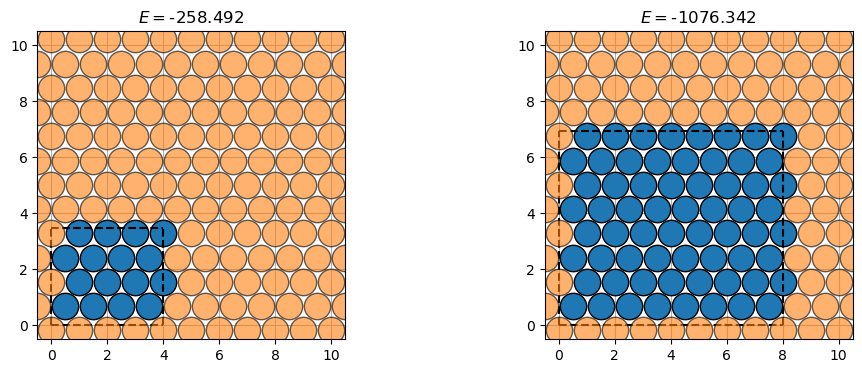

In [4]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
for ax, grid in zip(axs, [[-0.5,10.5], [-0.5,10.5]]):
    ax.set_xlim(grid)
    ax.set_ylim(grid)
    ax.grid()
    ax.set_aspect("equal")

atom_plotter = Atom_plotter(markersize=19)
axs[0].set_title(rf"$E = ${atom_col.get_potential_energy().round(3)}")
d = atom_plotter(atom_col=atom_col, ax=axs[0], plot_cell=True)
s = atom_plotter.plot_several_cells(atom_col=atom_col, ax=axs[0])
unit_cell = (2.0*l1, 2.0*l2)
l1, l2 = unit_cell
new_poses = []
for i in [0.0, 1.0]:
    for j in [0.0, 1.0]:
        disp_pos = atom_col.positions + l1*i + l2*j
        new_poses.append(disp_pos)
        
unit_cell = (2.0*l1, 2.0*l2)
atom_col = Atom_Collection(atomlist=[Atom(position=pos) for pos in np.array(new_poses).reshape(8**2, 2)], unit_cell=unit_cell, pbc=True)
atom_col.calculator = LennardJones()
axs[1].set_title(rf"$E = ${atom_col.get_potential_energy().round(3)}")
d = atom_plotter(atom_col=atom_col, ax=axs[1], plot_cell=True)
s = atom_plotter.plot_several_cells(atom_col=atom_col, ax=axs[1])